In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from seaborn import heatmap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [144]:
# Reading the data-set
data_set = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(data_set.head())

   Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]


In [145]:
# Check For Null Values
print(data_set.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [146]:
# For Duplicate Columns if present
print(len(data_set))
print(len(data_set.drop_duplicates()))

1470
1470


In [147]:
# Checking For Unique Values
print(data_set["BusinessTravel"].unique())
print(data_set["EmployeeCount"].unique())
print(data_set["StandardHours"].unique())
print(data_set["Over18"].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1]
[80]
['Y']


In [0]:
# Removing Columns
columns_to_remove = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"]
data_set.drop(columns=columns_to_remove, inplace=True)

Data-Set Visualization


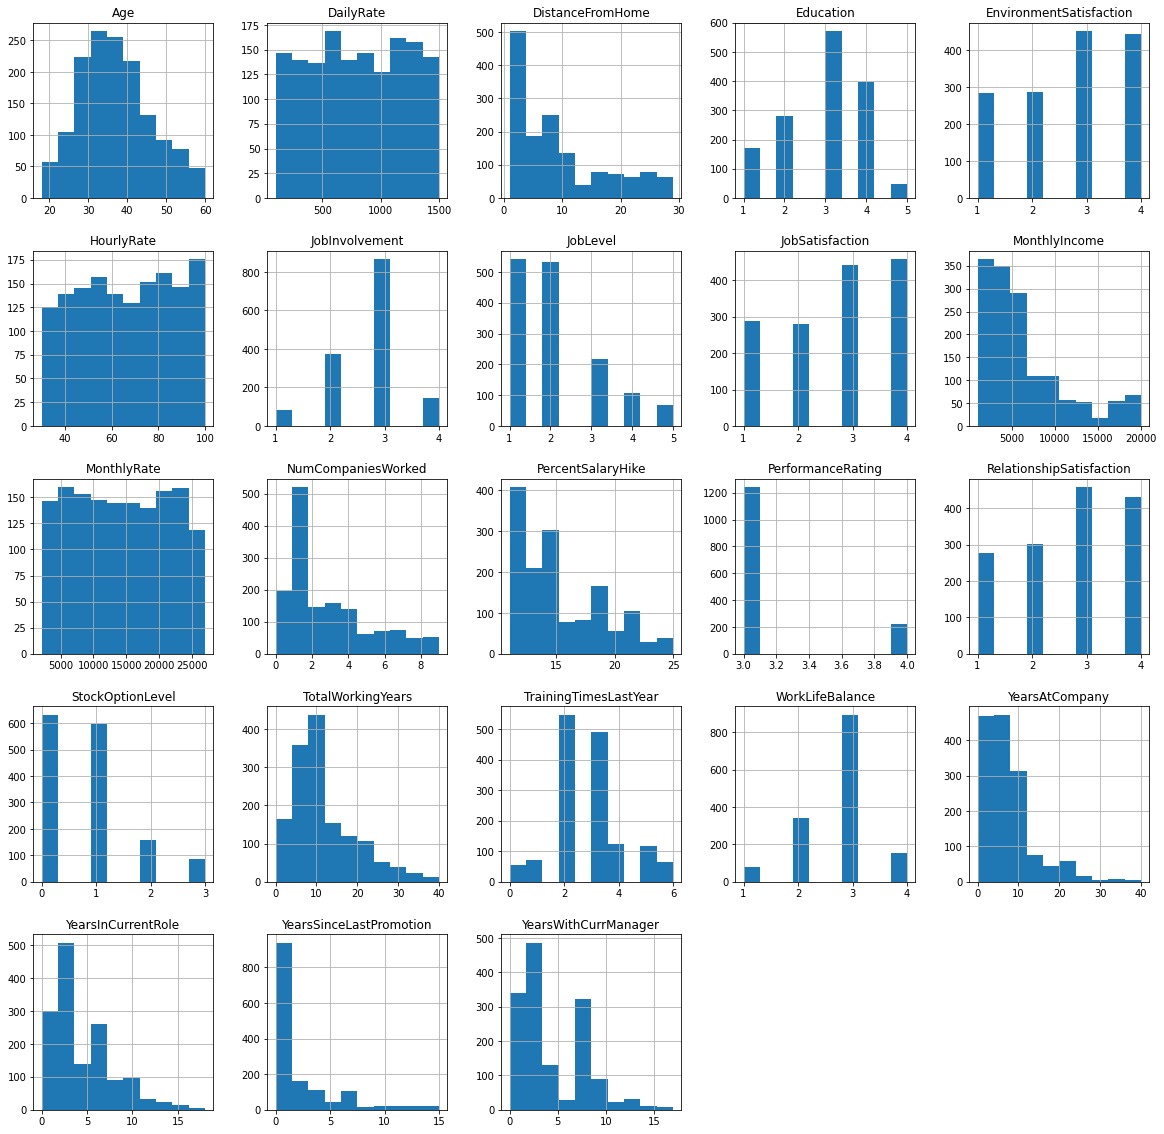

In [149]:
# Variations Of Data In respective columns
data_set.hist()
fig=plt.gcf()
fig.set_size_inches(20,20)

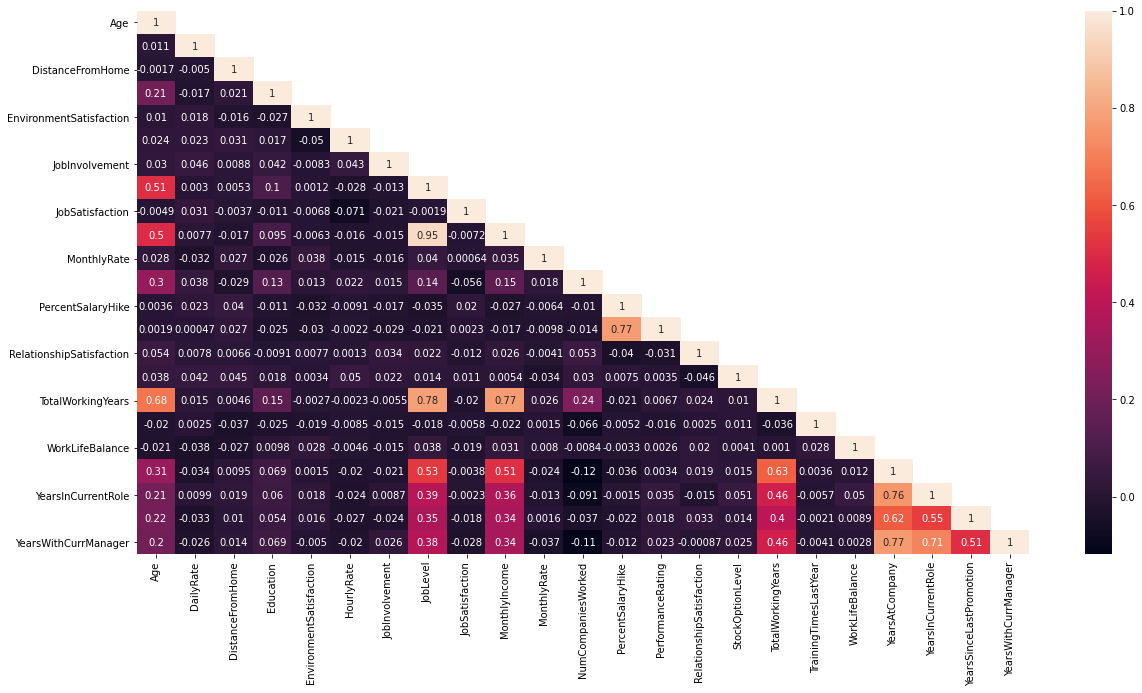

In [150]:
# Correlation
cor_mat = data_set.corr()
mask = np.array(cor_mat)
# Taking the lower triangle
mask[np.tril_indices_from(mask)] = False
heatmap(data_set.corr(), annot=True, mask=mask, cbar=True)
fig=plt.gcf()
fig.set_size_inches(20,10)

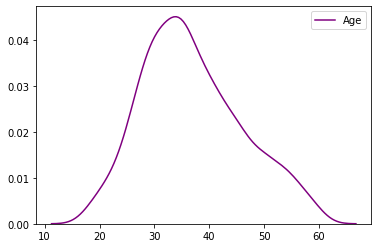

In [151]:
# KDE
sns.kdeplot(data_set['Age'], color='purple')
plt.show()

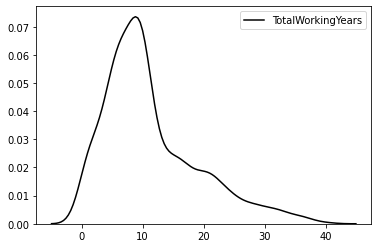

In [152]:
sns.kdeplot(data_set['TotalWorkingYears'], color='black')
plt.show()

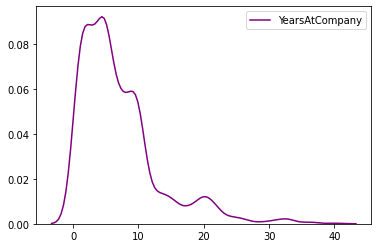

In [153]:
sns.kdeplot(data_set['YearsAtCompany'], color='purple')
plt.show()

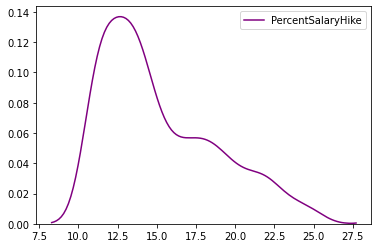

In [154]:
sns.kdeplot(data_set['PercentSalaryHike'], color='purple')
plt.show()

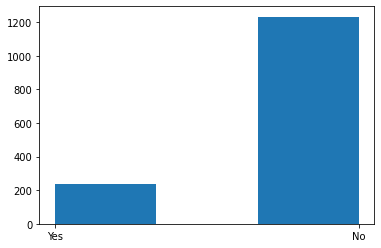

In [155]:
# Variations
plt.hist(data_set['Attrition'], bins=3)
plt.show()

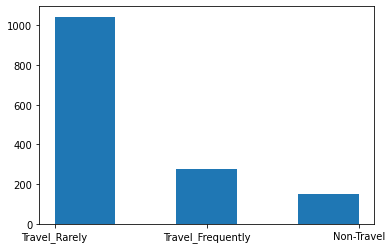

In [156]:
plt.hist(data_set['BusinessTravel'], bins=5)
plt.show()

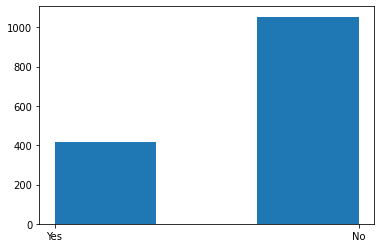

In [157]:
plt.hist(data_set['OverTime'], bins=3)
plt.show()

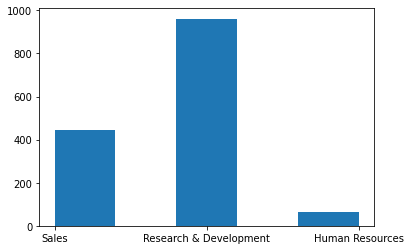

In [158]:
plt.hist(data_set['Department'], bins=5)
plt.show()

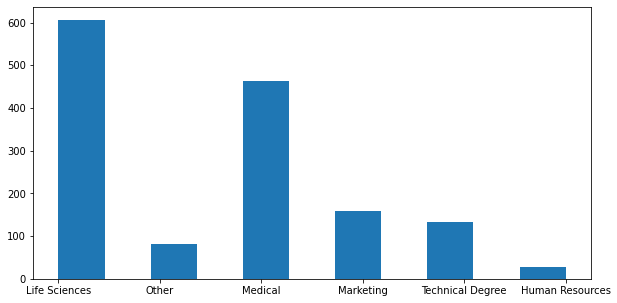

In [159]:
plt.hist(data_set['EducationField'], bins=11)
fig=plt.gcf()
fig.set_size_inches(10,5)

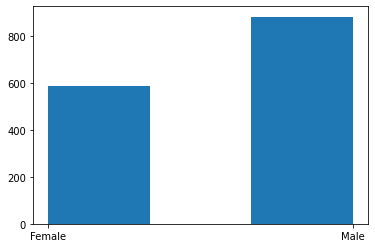

In [160]:
plt.hist(data_set['Gender'], bins=3)
plt.show()

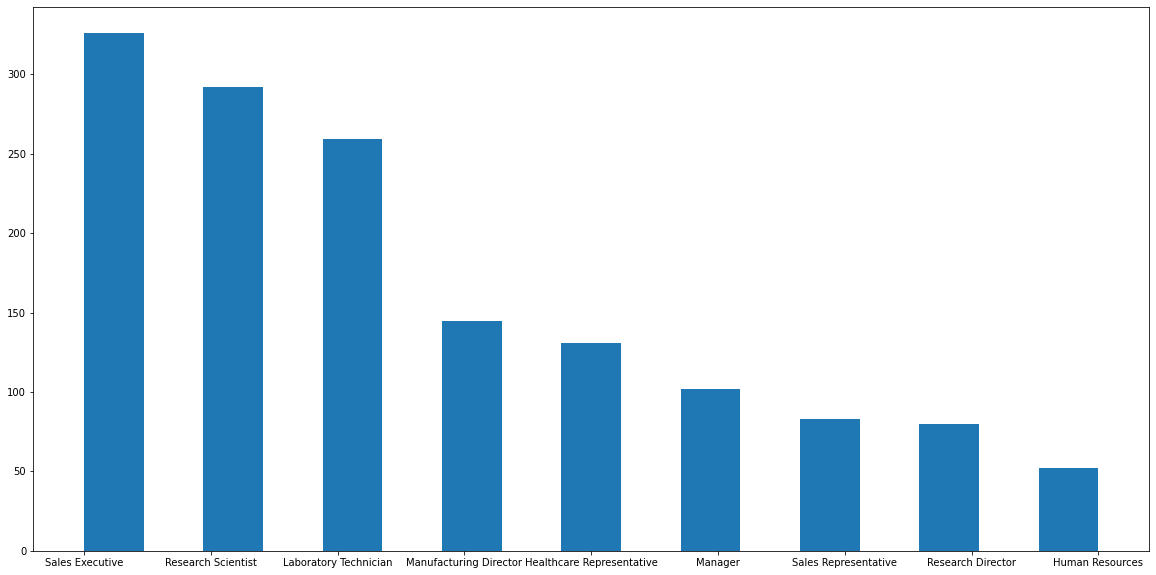

In [161]:
plt.hist(data_set['JobRole'], bins=17)
fig=plt.gcf()
fig.set_size_inches(20, 10)

In [0]:
# Encoding Columns
data_set.loc[:, "Attrition"] = LabelEncoder().fit_transform(data_set.loc[:, "Attrition"])
data_set.loc[:, "BusinessTravel"] = LabelEncoder().fit_transform(data_set.loc[:, "BusinessTravel"])
data_set.loc[:, "Department"] = LabelEncoder().fit_transform(data_set.loc[:, "Department"])
data_set.loc[:, "EducationField"] = LabelEncoder().fit_transform(data_set.loc[:, "EducationField"])
data_set.loc[:, "Gender"] = LabelEncoder().fit_transform(data_set.loc[:, "Gender"])
data_set.loc[:, "JobRole"] = LabelEncoder().fit_transform(data_set.loc[:, "JobRole"])
data_set.loc[:, "MaritalStatus"] = LabelEncoder().fit_transform(data_set.loc[:, "MaritalStatus"])
data_set.loc[:, "OverTime"] = LabelEncoder().fit_transform(data_set.loc[:, "OverTime"])

In [163]:
# Data-Set Columns
print(data_set.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [0]:
# Data-Set Extract
X = data_set.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                      18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]].values
y = data_set.iloc[:, 1].values

In [0]:
# Scaling The Values
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)
X_scaled = np.append(arr=np.ones((len(X_scaled), 1)).astype(float), values=X_scaled, axis=1)

In [0]:
# Splitting Data-Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, test_size=0.4)

In [167]:
# OverSampling
Smote = SMOTE(random_state=0)
X_train_Over, y_train_Over = Smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [168]:
# UnderSampling
NearMiss = NearMiss()
X_train_Under, y_train_Under = NearMiss.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


If need any other scoring technique for parameter tuning change the scoring metric below

In [0]:
# Scoring
scoring = make_scorer(balanced_accuracy_score)

In [0]:
# Logistic Regression
def Logistic_Grid():
    parameter = [{'penalty': ["l2", "none"]}]
    return parameter

In [0]:
def Decision_Grid():
    parameter = [{'criterion': ["gini", "entropy"]}]
    return parameter

In [0]:
def Random_Grid():
    parameter = [{'criterion': ["gini", "entropy"],
                  'n_estimators': [100, 200, 300, 400, 500]}]
    return parameter

In [0]:
def K_NN_Grid():
    parameter = [{'n_neighbors': [3, 5, 7]}]
    return parameter

In [0]:
def SVM_Grid():
    parameter = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                 {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
                  'gamma': [0.1, 0.001, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
    return parameter

In [0]:
def Scores_And_GridSearch(string, value):
    global parameters
    if value == 0:
        x, y_ = X_train, y_train
    elif value == 1:
        x, y_ = X_train_Over, y_train_Over
    else:
        x, y_ = X_train_Under, y_train_Under

    if string == "Logistic":
        parameters = Logistic_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring=scoring,
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "Decision":
        parameters = Decision_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring=scoring,
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "Random":
        parameters = Random_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring=scoring,
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "K":
        parameters = K_NN_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring=scoring,
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_parameters = grid_search.best_params_
        print(best_parameters)
    elif string == "SVM":
        parameters = SVM_Grid()
        grid_search = GridSearchCV(estimator=classifier,
                                   param_grid=parameters,
                                   scoring=scoring,
                                   cv=10,
                                   n_jobs=-1)

        grid_search = grid_search.fit(x, y_)
        best_parameters = grid_search.best_params_
        print(best_parameters)


In [0]:
def score_calculator():
    print("Accuracy :", balanced_accuracy_score(y_test, predictions))
    print("Confusion metric :", confusion_matrix(y_test, predictions))
    print("f1_Score :", f1_score(y_test, predictions))
    print("Precision :", precision_score(y_test, predictions))
    print("Recall :", recall_score(y_test, predictions))


In [177]:
# Logistic Classifier (Original Sample)
print("Logistic Classifier (Original Sample)")
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Logistic", 0)

Logistic Classifier (Original Sample)
Accuracy : 0.6545454545454545
Confusion metric : [[483  12]
 [ 62  31]]
f1_Score : 0.4558823529411765
Precision : 0.7209302325581395
Recall : 0.3333333333333333
{'penalty': 'none'}


In [178]:
# Logistic Classifier (Original Sample) With Parameter Tuned
print("Logistic Classifier (Original Sample) With Parameter Tuned")
classifier = LogisticRegression(penalty='none')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

Logistic Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.659921798631476
Confusion metric : [[483  12]
 [ 61  32]]
f1_Score : 0.4671532846715329
Precision : 0.7272727272727273
Recall : 0.34408602150537637


After Parameter Tuning Our Logistic Regression with origninal sample's
accuracy, f1_score is increased by approx 1%.


In [179]:
# Logistic Classifier (Over Sampling)
print("=" * 40)
print("Logistic Classifier (Over Sampling)")
classifier = LogisticRegression()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Logistic", 1)

Logistic Classifier (Over Sampling)
Accuracy : 0.7594982078853046
Confusion metric : [[374 121]
 [ 22  71]]
f1_Score : 0.49824561403508766
Precision : 0.3697916666666667
Recall : 0.7634408602150538
{'penalty': 'l2'}


In [180]:
# Logistic Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Logistic Classifier (Over Sampling) With Parameter Tuned")
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Logistic Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.7594982078853046
Confusion metric : [[374 121]
 [ 22  71]]
f1_Score : 0.49824561403508766
Precision : 0.3697916666666667
Recall : 0.7634408602150538


In [181]:
# Logistic Classifier (Under Sampling)
print("=" * 40)
print(" Logistic Classifier (Under Sampling)")
classifier = LogisticRegression()
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Logistic", 2)

 Logistic Classifier (Under Sampling)
Accuracy : 0.6413489736070381
Confusion metric : [[273 222]
 [ 25  68]]
f1_Score : 0.3550913838120104
Precision : 0.23448275862068965
Recall : 0.7311827956989247
{'penalty': 'l2'}


In [182]:
# Logistic Classifier (Under Sampling) With Parameter Tuned
print("=" * 40)
print(" Logistic Classifier (Under Sampling) With Parameter Tuned")
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()

 Logistic Classifier (Under Sampling) With Parameter Tuned
Accuracy : 0.6413489736070381
Confusion metric : [[273 222]
 [ 25  68]]
f1_Score : 0.3550913838120104
Precision : 0.23448275862068965
Recall : 0.7311827956989247


In [183]:
# Naive Bayes Classifier (Original Sample)
print("=" * 40)
print("Naive Bayes Classifier (Original Sample)")
classifier = GaussianNB()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

Naive Bayes Classifier (Original Sample)
Accuracy : 0.7269468882372108
Confusion metric : [[395 100]
 [ 32  61]]
f1_Score : 0.48031496062992124
Precision : 0.37888198757763975
Recall : 0.6559139784946236


In [184]:
# Naive Bayes Classifier (Over Sampling)
print("=" * 40)
print("Naive Bayes Classifier (Over Sampling)")
classifier = GaussianNB()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Naive Bayes Classifier (Over Sampling)
Accuracy : 0.683088954056696
Confusion metric : [[309 186]
 [ 24  69]]
f1_Score : 0.39655172413793105
Precision : 0.27058823529411763
Recall : 0.7419354838709677


In [185]:
# Naive Bayes Classifier (Under Sampling)
print("=" * 40)
print("Naive Bayes Classifier (Under Sampling)")
classifier = GaussianNB()
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()

Naive Bayes Classifier (Under Sampling)
Accuracy : 0.441544477028348
Confusion metric : [[171 324]
 [ 43  50]]
f1_Score : 0.21413276231263384
Precision : 0.13368983957219252
Recall : 0.5376344086021505


In [186]:
# Decision Tree Classifier (Original Sample)
print("=" * 40)
print("Decision Tree Classifier (Original Sample)")
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Decision", 0)

Decision Tree Classifier (Original Sample)
Accuracy : 0.589247311827957
Confusion metric : [[429  66]
 [ 64  29]]
f1_Score : 0.30851063829787234
Precision : 0.30526315789473685
Recall : 0.3118279569892473
{'criterion': 'entropy'}


In [187]:
# Decision Tree Classifier (Original Sample) with parameter Tuned
print("=" * 40)
print("Decision Tree Classifier (Original Sample) With Parameter Tuned")
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

Decision Tree Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.6316063864450961
Confusion metric : [[439  56]
 [ 58  35]]
f1_Score : 0.3804347826086956
Precision : 0.38461538461538464
Recall : 0.3763440860215054


In [188]:
# Decision Tree Classifier (Over Sampling)
print("=" * 40)
print("Decision Tree Classifier (Over Sampling)")
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Decision", 1)

Decision Tree Classifier (Over Sampling)
Accuracy : 0.6133919843597263
Confusion metric : [[405  90]
 [ 55  38]]
f1_Score : 0.34389140271493207
Precision : 0.296875
Recall : 0.40860215053763443
{'criterion': 'gini'}


In [189]:
# Decision Tree Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Decision Tree Classifier (Over Sampling) With Parameter Tuned")
classifier = DecisionTreeClassifier(random_state=0, criterion='gini')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Decision Tree Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.6133919843597263
Confusion metric : [[405  90]
 [ 55  38]]
f1_Score : 0.34389140271493207
Precision : 0.296875
Recall : 0.40860215053763443


In [190]:
# Decision Tree Classifier (Under Sampling)
print("=" * 40)
print("Decision Tree Classifier (Under Sampling)")
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Decision", 2)

Decision Tree Classifier (Under Sampling)
Accuracy : 0.54613880742913
Confusion metric : [[216 279]
 [ 32  61]]
f1_Score : 0.28175519630484985
Precision : 0.17941176470588235
Recall : 0.6559139784946236
{'criterion': 'entropy'}


In [191]:
# Decision Tree Classifier (Under Sampling) With Parameter Tuned
print("=" * 40)
print("Decision Tree Classifier (Under Sampling) With Parameter Tuned")
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()

Decision Tree Classifier (Under Sampling) With Parameter Tuned
Accuracy : 0.5958944281524927
Confusion metric : [[228 267]
 [ 25  68]]
f1_Score : 0.3177570093457944
Precision : 0.20298507462686566
Recall : 0.7311827956989247


In [192]:
# Random Forest Classifier (Original Sample)
print("=" * 40)
print("Random Forest Classifier (Original Sample) With Parameter Tuned")
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Random", 0)

Random Forest Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.5873574454219616
Confusion metric : [[491   4]
 [ 76  17]]
f1_Score : 0.2982456140350877
Precision : 0.8095238095238095
Recall : 0.1827956989247312
{'criterion': 'gini', 'n_estimators': 200}


In [209]:
# Random Forest Classifier (Original Sample) With Parameter Tuned
print("=" * 40)
print("Random Forest Classifier (Original Sample) With Parameter Tuned")
classifier = RandomForestClassifier(criterion='gini', n_estimators=200)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

Random Forest Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.5840013033561421
Confusion metric : [[493   2]
 [ 77  16]]
f1_Score : 0.2882882882882883
Precision : 0.8888888888888888
Recall : 0.17204301075268819


In [194]:
# Random Forest Classifier (Over Sampling)
print("=" * 40)
print("Random Forest Classifier (Over Sampling)")
classifier = RandomForestClassifier()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Random", 1)

Random Forest Classifier (Over Sampling)
Accuracy : 0.6320299771912675
Confusion metric : [[482  13]
 [ 66  27]]
f1_Score : 0.406015037593985
Precision : 0.675
Recall : 0.2903225806451613
{'criterion': 'gini', 'n_estimators': 100}


In [210]:
# Random Forest Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Random Forest Classifier (Over Sampling) With Parameter Tuned")
classifier = RandomForestClassifier(criterion='gini', n_estimators=100)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Random Forest Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.6202671880091235
Confusion metric : [[481  14]
 [ 68  25]]
f1_Score : 0.3787878787878788
Precision : 0.6410256410256411
Recall : 0.26881720430107525


In [196]:
# Random Forest Classifier (Under Sampling)
print("=" * 40)
print("Random Forest Classifier (Under Sampling)")
classifier = RandomForestClassifier()
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("Random", 2)

Random Forest Classifier (Under Sampling)
Accuracy : 0.5891169762137504
Confusion metric : [[200 295]
 [ 21  72]]
f1_Score : 0.3130434782608696
Precision : 0.19618528610354224
Recall : 0.7741935483870968
{'criterion': 'entropy', 'n_estimators': 100}


In [211]:
# Random Forest Classifier (Under Sampling) With Parameter Tuned
print("=" * 40)
print("Random Forest Classifier (Under Sampling) With Parameter Tuned")
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100)
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()

Random Forest Classifier (Under Sampling) With Parameter Tuned
Accuracy : 0.5992179863147605
Confusion metric : [[210 285]
 [ 21  72]]
f1_Score : 0.32000000000000006
Precision : 0.20168067226890757
Recall : 0.7741935483870968


In [198]:
# K-NN Classifier (Original Data)
print("=" * 40)
print("K-NN Classifier (Original Data)")
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("K", 0)

K-NN Classifier (Original Data)
Accuracy : 0.5433365917236885
Confusion metric : [[490   5]
 [ 84   9]]
f1_Score : 0.16822429906542055
Precision : 0.6428571428571429
Recall : 0.0967741935483871
{'n_neighbors': 3}


In [199]:
# K-NN Classifier (Original Data) With Parameter Tuned
print("=" * 40)
print("K-NN Classifier (Original Data) With Parameter Tuned")
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

K-NN Classifier (Original Data) With Parameter Tuned
Accuracy : 0.559107201042685
Confusion metric : [[479  16]
 [ 79  14]]
f1_Score : 0.22764227642276424
Precision : 0.4666666666666667
Recall : 0.15053763440860216


In [200]:
# K-NN Classifier (Over Sampling)
print("=" * 40)
print("K-NN Classifier (Over Sampling) With Parameter Tuned")
classifier = KNeighborsClassifier()
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("K", 1)

K-NN Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.648159009449332
Confusion metric : [[317 178]
 [ 32  61]]
f1_Score : 0.3674698795180723
Precision : 0.25523012552301255
Recall : 0.6559139784946236
{'n_neighbors': 3}


In [201]:
# K-NN Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("K-NN Classifier (Over Sampling) With Parameter Tuned")
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

K-NN Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.6361355490387748
Confusion metric : [[353 142]
 [ 41  52]]
f1_Score : 0.3623693379790941
Precision : 0.26804123711340205
Recall : 0.5591397849462365


In [202]:
# K-NN Classifier (Under Sampling)
print("=" * 40)
print("K-NN Classifier (Under Sampling)")
classifier = KNeighborsClassifier()
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("K", 2)

K-NN Classifier (Under Sampling)
Accuracy : 0.5750733137829912
Confusion metric : [[399  96]
 [ 61  32]]
f1_Score : 0.2895927601809955
Precision : 0.25
Recall : 0.34408602150537637
{'n_neighbors': 5}


In [203]:
# Support Vector Classifier (Original Sample)
print("=" * 40)
print("Support Vector Classifier (Original Sample)")
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("SVM", 0)

Support Vector Classifier (Original Sample)
Accuracy : 0.5722385141739981
Confusion metric : [[492   3]
 [ 79  14]]
f1_Score : 0.2545454545454546
Precision : 0.8235294117647058
Recall : 0.15053763440860216
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [204]:
# Support Vector Classifier (Original Sample) With Parameter Tuned
print("=" * 40)
print("Support Vector Classifier (Original Sample) With Parameter Tuned")
classifier = SVC(kernel='rbf', C=1000, gamma=0.01)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
score_calculator()

Support Vector Classifier (Original Sample) With Parameter Tuned
Accuracy : 0.6779732811990877
Confusion metric : [[437  58]
 [ 49  44]]
f1_Score : 0.45128205128205134
Precision : 0.43137254901960786
Recall : 0.4731182795698925


In [205]:
# Support Vector Classifier (Over Sampling)
print("=" * 40)
print("Support Vector Classifier (Over Sampling)")
classifier = SVC(kernel='rbf')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("SVM", 1)

Support Vector Classifier (Over Sampling)
Accuracy : 0.6911045943304008
Confusion metric : [[450  45]
 [ 49  44]]
f1_Score : 0.4835164835164835
Precision : 0.4943820224719101
Recall : 0.4731182795698925
{'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


In [206]:
# Support Vector Classifier (Over Sampling) With Parameter Tuned
print("=" * 40)
print("Support Vector Classifier (Over Sampling) With Parameter Tuned")
classifier = SVC(kernel='rbf', C=10, gamma=0.1)
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Support Vector Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.5372759856630824
Confusion metric : [[484  11]
 [ 84   9]]
f1_Score : 0.1592920353982301
Precision : 0.45
Recall : 0.0967741935483871


In [207]:
# Support Vector Classifier (Under Sampling)
print("=" * 40)
print("Support Vector Classifier (Under Sampling)")
classifier = SVC(kernel='rbf')
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()
Scores_And_GridSearch("SVM", 2)

Support Vector Classifier (Under Sampling)
Accuracy : 0.5904529162593679
Confusion metric : [[196 299]
 [ 20  73]]
f1_Score : 0.3139784946236559
Precision : 0.19623655913978494
Recall : 0.7849462365591398
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [208]:
# Support Vector Classifier (Under Sampling) With Parameter Tuned
print("=" * 40)
print("Support Vector Classifier (Under Sampling) With Parameter Tuned")
classifier = SVC(kernel='rbf', C=1, gamma=0.4)
classifier.fit(X_train_Under, y_train_Under)
predictions = classifier.predict(X_test)
score_calculator()

Support Vector Classifier (Under Sampling) With Parameter Tuned
Accuracy : 0.5077875529488433
Confusion metric : [[ 29 466]
 [  4  89]]
f1_Score : 0.27469135802469136
Precision : 0.16036036036036036
Recall : 0.956989247311828


After Performing parameter tuning, over-sampling and under-sampling we came to a conclusing for choosing a model with good recall_score and a good balanced_accuracy score. <br>
We are choosing balanced accuracy score because it is a measure of recall of positive class + recall of negative class and it outperforms f1_score when positives >> negatives
<br>
We according to the results got, the best model is Logistic Classifier with oversampling
<br>
Cause we are getting a good balanced accuracy around 76%<br>
And a recall about 76.5% 

In [212]:
print("=" * 40)
print("Logistic Classifier")
classifier = LogisticRegression(penalty='l2')
classifier.fit(X_train_Over, y_train_Over)
predictions = classifier.predict(X_test)
score_calculator()

Logistic Classifier (Over Sampling) With Parameter Tuned
Accuracy : 0.7594982078853046
Confusion metric : [[374 121]
 [ 22  71]]
f1_Score : 0.49824561403508766
Precision : 0.3697916666666667
Recall : 0.7634408602150538
